In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-38-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Tue Jan 19 2021 14:53:51CET



## Load of the data

In [3]:
regen_data = False

In [4]:
if regen_data:
    from process import load_generate_data
    from process import savedata
    regr_data, class_data = load_generate_data(0.1, 50)
    savedata(regr_data, "regression_data.csv")
    savedata(class_data, "classification_data.csv")

In [5]:
if not regen_data:
    from process import loaddata
    regr_data = loaddata("regression_data.csv")
    class_data = loaddata("classification_data.csv")

In [6]:
np.random.shuffle(class_data)
y = class_data[:,0]
x = class_data[:,1:]

In [7]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 51865 
Valuation sample: 17289


In [8]:
x.shape

(69154, 10)

In [9]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [11]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16, activation = "relu" , input_shape = x.shape))
    model.add (layers.Dense (16, activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [14]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 50, batch_size = 2 , validation_data = (x_val, y_val) )
model.save("prova.h5")

Epoch 1/50
25933/25933 [==============================] - 24s 910us/step - loss: 0.3568 - accuracy: 0.8528 - val_loss: 0.2293 - val_accuracy: 0.9139
Epoch 2/50
25933/25933 [==============================] - 24s 930us/step - loss: 0.2105 - accuracy: 0.9261 - val_loss: 0.1943 - val_accuracy: 0.9350
Epoch 3/50
25933/25933 [==============================] - 22s 853us/step - loss: 0.2027 - accuracy: 0.9292 - val_loss: 0.2102 - val_accuracy: 0.9268
Epoch 4/50
25933/25933 [==============================] - 24s 934us/step - loss: 0.1958 - accuracy: 0.9331 - val_loss: 0.1905 - val_accuracy: 0.9346
Epoch 5/50
25933/25933 [==============================] - 24s 917us/step - loss: 0.1951 - accuracy: 0.9333 - val_loss: 0.1810 - val_accuracy: 0.9389
Epoch 6/50
25933/25933 [==============================] - 25s 948us/step - loss: 0.1933 - accuracy: 0.9338 - val_loss: 0.2006 - val_accuracy: 0.9316
Epoch 7/50
25933/25933 [==============================] - 27s 1ms/step - loss: 0.1910 - accuracy: 0.9344 -

Epoch 49/50
25933/25933 [==============================] - 23s 901us/step - loss: 0.1710 - accuracy: 0.9435 - val_loss: 0.1686 - val_accuracy: 0.9457
Epoch 50/50
25933/25933 [==============================] - 22s 835us/step - loss: 0.1701 - accuracy: 0.9443 - val_loss: 0.1653 - val_accuracy: 0.9476


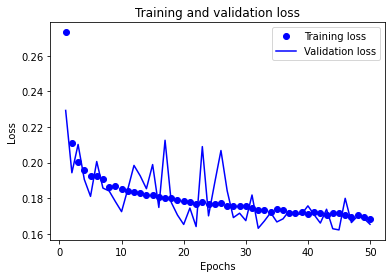

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



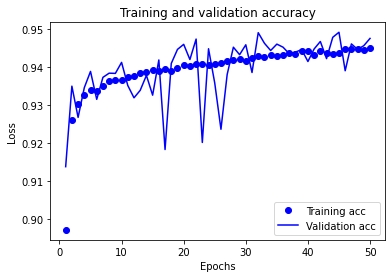

In [16]:
plt.clf()   # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16 , activation = "relu" , input_shape = x.shape))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (16, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [18]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 50, batch_size = 2 , validation_data = (x_val, y_val) )
model.save("prova.h5")

Epoch 1/50
25933/25933 [==============================] - 24s 904us/step - loss: 0.4331 - accuracy: 0.7793 - val_loss: 0.2447 - val_accuracy: 0.9104
Epoch 2/50
25933/25933 [==============================] - 23s 896us/step - loss: 0.2465 - accuracy: 0.9089 - val_loss: 0.1893 - val_accuracy: 0.9382
Epoch 3/50
25933/25933 [==============================] - 24s 908us/step - loss: 0.2318 - accuracy: 0.9164 - val_loss: 0.2199 - val_accuracy: 0.9256
Epoch 4/50
25933/25933 [==============================] - 23s 902us/step - loss: 0.2306 - accuracy: 0.9165 - val_loss: 0.2494 - val_accuracy: 0.8939
Epoch 5/50
25933/25933 [==============================] - 22s 864us/step - loss: 0.2277 - accuracy: 0.9186 - val_loss: 0.2303 - val_accuracy: 0.9100
Epoch 6/50
25933/25933 [==============================] - 23s 905us/step - loss: 0.2219 - accuracy: 0.9207 - val_loss: 0.2148 - val_accuracy: 0.9228
Epoch 7/50
25933/25933 [==============================] - 38s 1ms/step - loss: 0.2170 - accuracy: 0.9232 -

Epoch 49/50
25933/25933 [==============================] - 35s 1ms/step - loss: 0.1879 - accuracy: 0.9371 - val_loss: 0.1695 - val_accuracy: 0.9444
Epoch 50/50
25933/25933 [==============================] - 34s 1ms/step - loss: 0.1921 - accuracy: 0.9351 - val_loss: 0.2000 - val_accuracy: 0.9279


## Adding Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Geoff Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a
given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

##### [From Deep Learning with Python, Chollet]

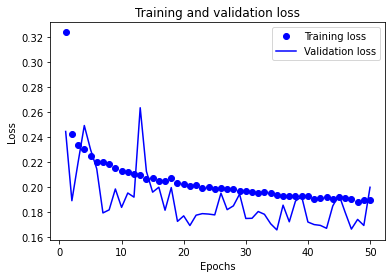

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



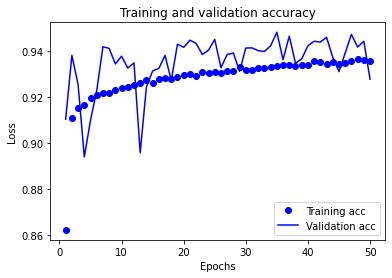

In [20]:
plt.clf()   # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()